In [1]:
import pandas as pd
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
!ls data/

class_map.csv	       test.csv			  train.csv
imgs		       test_image_data_0.parquet  train_image_data_0.parquet
Kalpurush.ttf	       test_image_data_1.parquet  train_image_data_1.parquet
Kalpurush.zip	       test_image_data_2.parquet  train_image_data_2.parquet
sample_submission.csv  test_image_data_3.parquet  train_image_data_3.parquet


In [4]:
ss = pd.read_csv("data/sample_submission.csv")

In [5]:
ss.head(4)

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0


In [6]:
cm = pd.read_csv("data/class_map.csv")

In [7]:
cm.head(3)

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ


In [5]:
cm.component_type.unique()

array(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'],
      dtype=object)

In [9]:
cmap_vow_diac = cm[cm.component_type == "vowel_diacritic"]

In [10]:
cmap_vow_diac

,component_type,label,component
168,vowel_diacritic,0,0
169,vowel_diacritic,1,া
170,vowel_diacritic,2,ি
171,vowel_diacritic,3,ী
172,vowel_diacritic,4,ু
173,vowel_diacritic,5,ূ
174,vowel_diacritic,6,ৃ
175,vowel_diacritic,7,ে
176,vowel_diacritic,8,ৈ
177,vowel_diacritic,9,ো


In [8]:
cmap_cons_diac = cm[cm.component_type == "consonant_diacritic"]

In [9]:
cmap_cons_diac

,component_type,label,component
179,consonant_diacritic,0,0
180,consonant_diacritic,1,ঁ
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র
185,consonant_diacritic,6,্র্য


In [10]:
cmap_grap_root = cm[cm.component_type == "grapheme_root"]

In [11]:
cmap_grap_root

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
5,grapheme_root,5,ঈ
6,grapheme_root,6,উ
7,grapheme_root,7,ঊ
8,grapheme_root,8,ঋ
9,grapheme_root,9,এ


In [12]:
trn = pd.read_csv("data/train.csv")

In [13]:
trn.head(12)

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
5,Train_5,153,9,0,স্পো
6,Train_6,52,2,0,ঞ্জি
7,Train_7,139,3,0,ষী
8,Train_8,67,0,0,ত্থ
9,Train_9,64,7,1,তেঁ


In [14]:
cm.columns

Index(['component_type', 'label', 'component'], dtype='object')

In [15]:
len(trn)

200840

In [16]:
!ls data

class_map.csv	       test_image_data_0.parquet  train_image_data_0.parquet
Kalpurush.ttf	       test_image_data_1.parquet  train_image_data_1.parquet
Kalpurush.zip	       test_image_data_2.parquet  train_image_data_2.parquet
sample_submission.csv  test_image_data_3.parquet  train_image_data_3.parquet
test.csv	       train.csv


In [17]:
HEIGHT = 237
WIDTH = 336
def image_from_char(char):
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('./data/Kalpurush.ttf', 120)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 3), char, font=myfont)
    
    return image

In [18]:
trn.grapheme[0]

'ক্ট্রো'

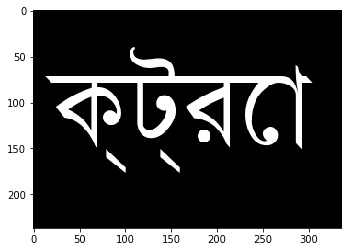

In [19]:
plt.imshow(image_from_char(trn.grapheme[0]))

### take a grapheme and display -> graphreme root, vow and conso diactritics

In [20]:
# train.csv has a map from grapheme to grapheme root, and dicritics
# cmap_vow_diac maps from vow diacritic index to character in font
# cmap_cons_diac from conso diacritic index to character in font
# cmap_grap_root from index to grapeme root
# all indices are available in train.csv
# read a row in train.csv and plot grapherme, root and dicatritcs

In [21]:
im_id,root,vd,cd,grap = trn.loc[0]

In [22]:
trn.loc[0].values

array(['Train_0', 15, 9, 5, 'ক্ট্রো'], dtype=object)

In [195]:
def k():
    for i,data in trn.iterrows():
        f, ax = plt.subplots(2,2,figsize=(6,6))
        ax = ax.flatten()
        print(i)
        ax[0].imshow(image_from_char(data.grapheme)) # grapheme
        ax[1].imshow(image_from_char(cmap_grap_root.component[cmap_grap_root.label==data.grapheme_root].values[0])) #root
        ax[2].imshow(image_from_char(cmap_vow_diac.component[cmap_vow_diac.label==data.vowel_diacritic].values[0])) #root
        ax[3].imshow(image_from_char(cmap_cons_diac.component[cmap_cons_diac.label==data.consonant_diacritic].values[0])) 
        f.canvas.draw()
        yield


In [220]:
g = k()

68


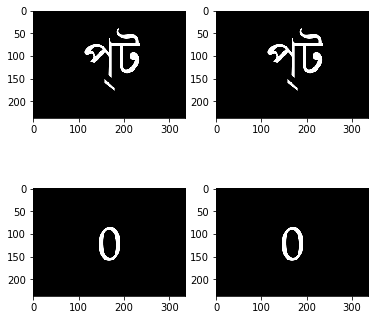

In [289]:
next(g)